Veriler yükleniyor...

--- YÜKLEME BAŞARILI ---
Toplam İz Sayısı (Traces): 1000
Her İzin Uzunluğu (Samples): 5000
Plaintext Sayısı: 1000 (Genelde iz sayısına eşit olmalı)
Hedef Anahtar (HEX): ['0x2b', '0x7e', '0x15', '0x16', '0x28', '0xae', '0xd2', '0xa6', '0xab', '0xf7', '0x15', '0x88', '0x9', '0xcf', '0x4f', '0x3c']


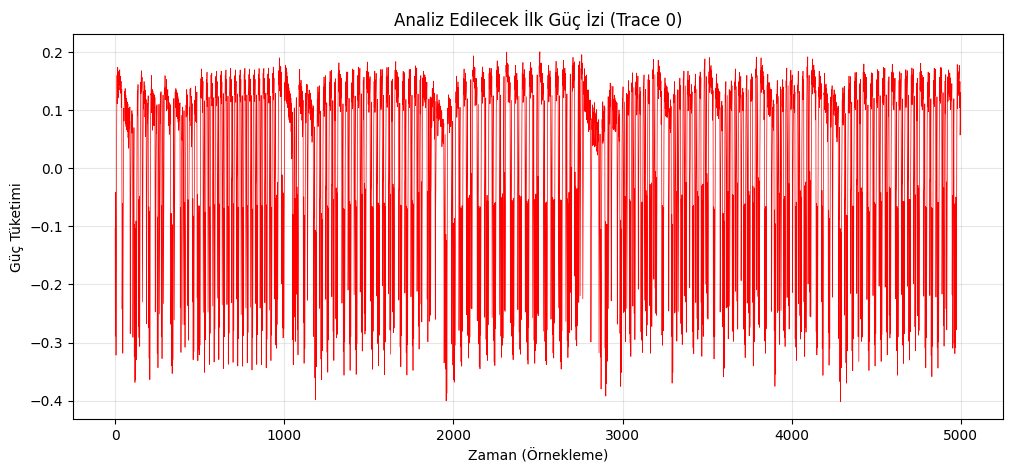


Grafiği gördüysen her şey yolunda demektir.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


TRACE_FILE = r'C:\Users\ALPEREN\Desktop\Crypto\sca101\lab4_1_traces.npy'
PTEXT_FILE = r'C:\Users\ALPEREN\Desktop\Crypto\sca101\lab4_1_textin.npy'
KEY_FILE   = r'C:\Users\ALPEREN\Desktop\Crypto\sca101\lab4_1_key.npy'

print("Veriler yükleniyor...")

try:
    # 1. NumPy ile Dosyaları Yükle
    traces = np.load(TRACE_FILE)
    textin = np.load(PTEXT_FILE)
    known_key = np.load(KEY_FILE)

    # 2. Boyutları Kontrol Et
    print("\n--- YÜKLEME BAŞARILI ---")
    print(f"Toplam İz Sayısı (Traces): {traces.shape[0]}")
    print(f"Her İzin Uzunluğu (Samples): {traces.shape[1]}")
    print(f"Plaintext Sayısı: {textin.shape[0]} (Genelde iz sayısına eşit olmalı)")
    
    # 3. Gizli Anahtarı Ekrana Yazdıralım
  
    if known_key.ndim > 1:
        
        target_key = known_key[0] 
    else:
        target_key = known_key
        
    print(f"Hedef Anahtar (HEX): {[hex(x) for x in target_key]}")

    # 4. İlk Güç İzini Çiz (Görsel Kontrol)
    plt.figure(figsize=(12, 5))
    plt.plot(traces[0], color='red', linewidth=0.5)
    plt.title("Analiz Edilecek İlk Güç İzi (Trace 0)")
    plt.xlabel("Zaman (Örnekleme)")
    plt.ylabel("Güç Tüketimi")
    plt.grid(True, alpha=0.3)
    plt.show()

    print("\nGrafiği gördüysen her şey yolunda demektir.")

except Exception as e:
    print(f"\nHATA OLUŞTU: {e}")
    print("Dosya yollarını kontrol etmeyi unutma.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. AES S-Box Tablosu (Sabit Değerler)
aes_sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

# 2. Hamming Weight (HW) Tablosu
# Bir sayının binary halindeki '1'lerin sayısı güç tüketimiyle orantılıdır.
# Örn: HW(0000 0011) = 2
hw_table = [bin(x).count("1") for x in range(256)]

def calculate_diffs(guess, byte_index, traces, textin):
    """
    Belirli bir anahtar tahmini için korelasyonu hesaplar.
    """
    n_traces = traces.shape[0]
    
 
    hypothetical_power = np.zeros(n_traces)
    for i in range(n_traces):
        # Plaintext'in ilgili byte'ını al
        pt_byte = textin[i, byte_index]
        # XOR ve S-Box işlemi
        val = aes_sbox[pt_byte ^ guess]
        # Güç tüketimini (Hamming Weight) modelle
        hypothetical_power[i] = hw_table[val]
    
 

    mean_h = np.mean(hypothetical_power)
    diff_h = hypothetical_power - mean_h
    
    # Trace üzerinde (sütun bazlı) korelasyon hesabı
    # Tüm trace noktalarıyla tek tek karşılaştırıyoruz
    mean_t = np.mean(traces, axis=0)
    diff_t = traces - mean_t
    
    numerator = np.dot(diff_h, diff_t)
    denominator = np.sqrt(np.sum(diff_h**2)) * np.sqrt(np.sum(diff_t**2, axis=0))
    
    correlation = np.abs(numerator / denominator)
    return np.max(correlation) # En yüksek korelasyonu (peak) döndür

# --- SALDIRI BAŞLIYOR ---
print("CPA Saldırısı Başlatılıyor... Lütfen bekleyin.")

recovered_key = []

# AES anahtarı 16 byte'tır. Hepsini tek tek kıralım.
from tqdm import tqdm 

for key_byte_index in range(16):
    best_guess = 0
    max_corr = 0
    
    # 0'dan 255'e kadar tüm olası anahtarları dene
    # (tqdm kullanmıyorsan 'range(256)' yazabilirsin)
    for guess in range(256):
        corr = calculate_diffs(guess, key_byte_index, traces, textin)
        
        if corr > max_corr:
            max_corr = corr
            best_guess = guess
            
    recovered_key.append(best_guess)
    print(f"Byte {key_byte_index} Kırıldı: {hex(best_guess)} (Korelasyon: {max_corr:.4f})")

print("\n--- SALDIRI TAMAMLANDI ---")
print("Bulunan Anahtar (HEX): ", [hex(x) for x in recovered_key])

# Doğrulama (Eğer elinde known_key varsa)
try:
    if 'known_key' in locals() or 'target_key' in locals():
        real_key = target_key if 'target_key' in locals() else known_key[0]
        print("Gerçek Anahtar  (HEX): ", [hex(x) for x in real_key])
        
        if list(recovered_key) == list(real_key):
            print("\nSONUÇ: ✅ BAŞARILI! Anahtar birebir eşleşti.")
        else:
            print("\nSONUÇ: ❌ BAZI HATALAR VAR. Gürültü fazla olabilir veya trace sayısı yetersiz.")
except:
    pass

CPA Saldırısı Başlatılıyor... Lütfen bekleyin.
Byte 0 Kırıldı: 0x2b (Korelasyon: 0.8390)
Byte 1 Kırıldı: 0x7e (Korelasyon: 0.8305)
Byte 2 Kırıldı: 0x15 (Korelasyon: 0.8438)
Byte 3 Kırıldı: 0x16 (Korelasyon: 0.8462)
Byte 4 Kırıldı: 0x28 (Korelasyon: 0.8016)
Byte 5 Kırıldı: 0xae (Korelasyon: 0.8252)
Byte 6 Kırıldı: 0xd2 (Korelasyon: 0.8706)
Byte 7 Kırıldı: 0xa6 (Korelasyon: 0.8461)
Byte 8 Kırıldı: 0xab (Korelasyon: 0.7917)
Byte 9 Kırıldı: 0xf7 (Korelasyon: 0.8206)
Byte 10 Kırıldı: 0x15 (Korelasyon: 0.7701)
Byte 11 Kırıldı: 0x88 (Korelasyon: 0.8160)
Byte 12 Kırıldı: 0x9 (Korelasyon: 0.8320)
Byte 13 Kırıldı: 0xcf (Korelasyon: 0.8324)
Byte 14 Kırıldı: 0x4f (Korelasyon: 0.8065)
Byte 15 Kırıldı: 0x3c (Korelasyon: 0.8041)

--- SALDIRI TAMAMLANDI ---
Bulunan Anahtar (HEX):  ['0x2b', '0x7e', '0x15', '0x16', '0x28', '0xae', '0xd2', '0xa6', '0xab', '0xf7', '0x15', '0x88', '0x9', '0xcf', '0x4f', '0x3c']
Gerçek Anahtar  (HEX):  ['0x2b', '0x7e', '0x15', '0x16', '0x28', '0xae', '0xd2', '0xa6', '0xab',

Byte 0 için Görselleştirme Hazırlanıyor...
Grafik verileri hesaplanıyor (NumPy)...


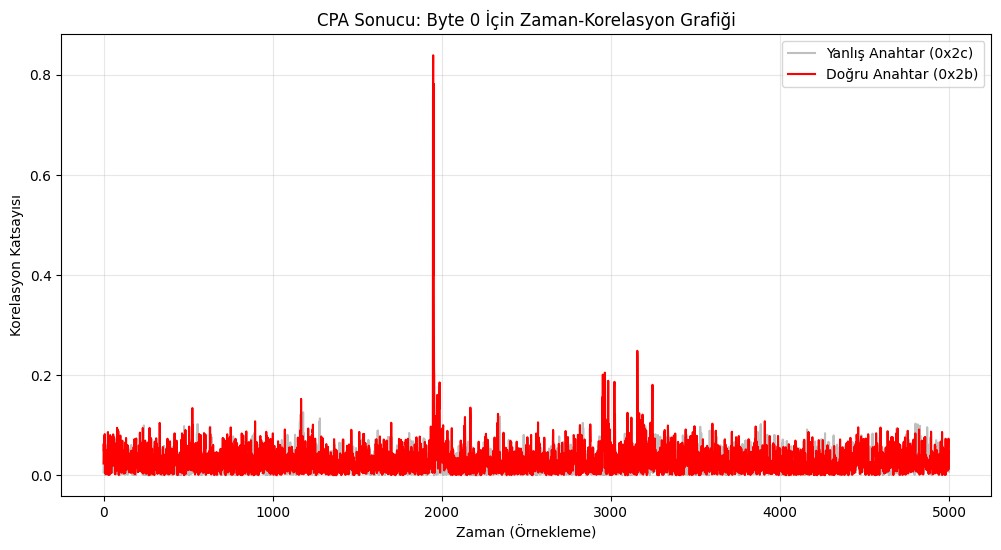

Grafik çizildi! Kırmızı çizginin yükseldiği yer, AES işleminin gerçekleştiği andır.


In [ ]:
import matplotlib.pyplot as plt

# Hangi Byte için grafik çizelim? (Örn: 0. Byte)
target_byte = 0
correct_key_byte = recovered_key[target_byte] 

print(f"Byte {target_byte} için Görselleştirme Hazırlanıyor...")

# Tüm zaman noktaları için korelasyonları saklayacağımız yerler
corr_correct_key = []
corr_wrong_keys = []



# 1. Hamming Weight Matrisini Oluştur (N_Traces x 1)
# Sadece doğru anahtar ve rastgele bir yanlış anahtar için yapalım ki hızlı olsun.
wrong_key_byte = (correct_key_byte + 1) % 256

# Doğru Anahtarın Tahmini Güç Tüketimi
hw_correct = np.zeros(traces.shape[0])
hw_wrong   = np.zeros(traces.shape[0])

for i in range(traces.shape[0]):
    val_c = aes_sbox[textin[i, target_byte] ^ correct_key_byte]
    val_w = aes_sbox[textin[i, target_byte] ^ wrong_key_byte]
    hw_correct[i] = hw_table[val_c]
    hw_wrong[i]   = hw_table[val_w]

# 2. Korelasyonu Zaman Boyunca Hesapla


def fast_correlation(hw_model, trace_matrix):
    n = trace_matrix.shape[0]
    # Ortalamaları çıkar
    hw_mean = hw_model - np.mean(hw_model)
    traces_mean = trace_matrix - np.mean(trace_matrix, axis=0)
    
    # Pay (Numerator)
    numerator = np.dot(hw_mean, traces_mean)
    
    # Payda (Denominator)
    ss_hw = np.sum(hw_mean ** 2)
    ss_traces = np.sum(traces_mean ** 2, axis=0)
    denominator = np.sqrt(ss_hw * ss_traces)
    
    # Sıfıra bölme hatasını önle
    denominator[denominator == 0] = 1 
    
    return np.abs(numerator / denominator)

print("Grafik verileri hesaplanıyor (NumPy)...")
cpa_correct = fast_correlation(hw_correct, traces)
cpa_wrong   = fast_correlation(hw_wrong, traces)

# 3. Grafiği Çiz
plt.figure(figsize=(12, 6))
plt.plot(cpa_wrong, color='gray', alpha=0.5, label=f"Yanlış Anahtar (0x{wrong_key_byte:02x})")
plt.plot(cpa_correct, color='red', linewidth=1.5, label=f"Doğru Anahtar (0x{correct_key_byte:02x})")
plt.title(f"CPA Sonucu: Byte {target_byte} İçin Zaman-Korelasyon Grafiği")
plt.xlabel("Zaman (Örnekleme)")
plt.ylabel("Korelasyon Katsayısı")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Grafik çizildi! Kırmızı çizginin yükseldiği yer, AES işleminin gerçekleştiği andır.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- DPA AYARLARI ---
# Hangi bit'e göre gruplandıralım? (Genelde 0. bit yani LSB en çok sızdıran bittir)
TARGET_BIT = 0 

print(f"DPA Saldırısı Başlatılıyor (Hedef Bit: {TARGET_BIT})...")

# S-Box (Daha önce tanımlamıştık ama tekrar hatırlatalım)
aes_sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

dpa_recovered_key = []

# Sadece ilk byte'ı örnek olarak kıralım (Hepsini kırmak CPA ile aynı sürede olur)
for byte_index in range(16): 
    max_diff = 0
    best_guess = 0
    
    # Tüm anahtar ihtimallerini dene (0-255)
    for guess in range(256):
        
        # 1. Grupları Belirle (Vectorized - Hızlı Yöntem)
        # S-Box çıkışını hesapla
        # traces değişkeninin ve textin değişkeninin yüklü olduğunu varsayıyoruz
        
        # textin'in ilgili byte'ı ile tahmini XOR'la -> SBox'a sok
        # Python listesi olan aes_sbox'ı numpy array yaparsak çok hızlanır
        sbox_out = np.array(aes_sbox)[textin[:, byte_index] ^ guess]
        
        # Hedef bite göre maske oluştur (Bit 1 ise True, 0 ise False)
        # (sbox_out >> TARGET_BIT) & 1
        group_mask = (sbox_out >> TARGET_BIT) & 1
        
        # 2. Ortalamaları Al (Mean of Partition)
        # traces[group_mask == 1] -> Biti 1 olan izler
        # traces[group_mask == 0] -> Biti 0 olan izler
        
        mean_one = np.mean(traces[group_mask == 1], axis=0)
        mean_zero = np.mean(traces[group_mask == 0], axis=0)
        
        # 3. Farkı Hesapla (Difference of Means)
        # Fark grafiğinin en yüksek tepesine bak
        diff = np.abs(mean_one - mean_zero)
        peak_val = np.max(diff)
        
        if peak_val > max_diff:
            max_diff = peak_val
            best_guess = guess
            
    dpa_recovered_key.append(best_guess)
    print(f"DPA - Byte {byte_index} Kırıldı: {hex(best_guess)} (Fark Skoru: {max_diff:.4f})")

print("\nDPA Sonucu Bulunan Anahtar:", [hex(x) for x in dpa_recovered_key])